# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your Emory ID below

In [2]:
# Write your answer here
# 2517419

<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


**By printing the message, you acknowledge that you will abide by Emory's code of conduct.**


In [3]:
# Write your answer here:
# I will abide by Emory's code of conduct

<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [4]:
# Write your answer here
import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following df:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "df.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 20.


In [22]:
# Write your own code
df = pd.read_csv('C://Users//Felix Huang//Documents//GitHub//qtm151_fall_2023//quizzes//quiz_5//data_raw//df.csv')
df['date_string'] = pd.to_datetime(df['date_string'], format = "%A, %b %d, %Y")

df


,date_string,eur_to_usd,gbp_to_usd
0,1999-01-04,1.6581,1.1812
1,1999-01-05,1.6566,1.1760
2,1999-01-06,1.6547,1.1636
3,1999-01-07,1.6495,1.1672
4,1999-01-08,1.6405,1.1554
...,...,...,...
6320,2023-03-27,1.2278,1.0789
6321,2023-03-28,1.2341,1.0844
6322,2023-03-29,1.2313,1.0826
6323,2023-03-30,1.2368,1.0899


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 21 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


Text(0, 0.5, 'exchange rate')

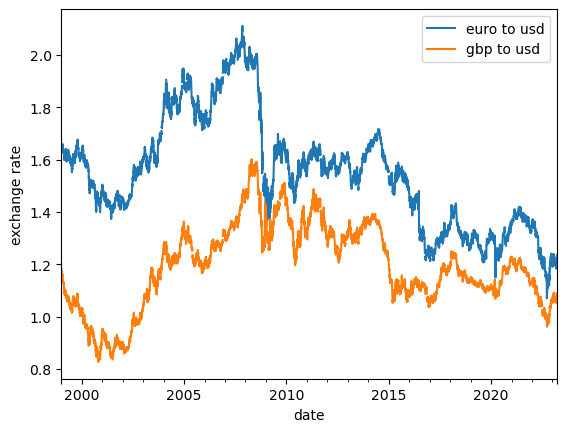

In [31]:
# Write your own code
df[["date","eur_to_usd","gbp_to_usd"]].set_index("date").plot()
plt.legend(["euro to usd","gbp to usd"])
plt.ylabel("exchange rate")

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)``` as in Lecture 21

In [26]:
# Write your own code
df["diff_euro"] = df["eur_to_usd"].diff()
df["lag_euro"]    = df["eur_to_usd"].shift(1)
df["growth_euro"] = (df["diff_euro"]/df["lag_euro"])* 100

df

,eur_to_usd,gbp_to_usd,date,diff_euro,lag_euro,growth_euro
0,1.6581,1.1812,1999-01-04,NaN,NaN,NaN
1,1.6566,1.1760,1999-01-05,-0.0015,1.6581,-0.090465
2,1.6547,1.1636,1999-01-06,-0.0019,1.6566,-0.114693
3,1.6495,1.1672,1999-01-07,-0.0052,1.6547,-0.314256
4,1.6405,1.1554,1999-01-08,-0.0090,1.6495,-0.545620
...,...,...,...,...,...,...
6320,1.2278,1.0789,2023-03-27,0.0053,1.2225,0.433538
6321,1.2341,1.0844,2023-03-28,0.0063,1.2278,0.513113
6322,1.2313,1.0826,2023-03-29,-0.0028,1.2341,-0.226886
6323,1.2368,1.0899,2023-03-30,0.0055,1.2313,0.446682


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 21 to create a shaded region <br>
for time periods where "bool_cond" is true.



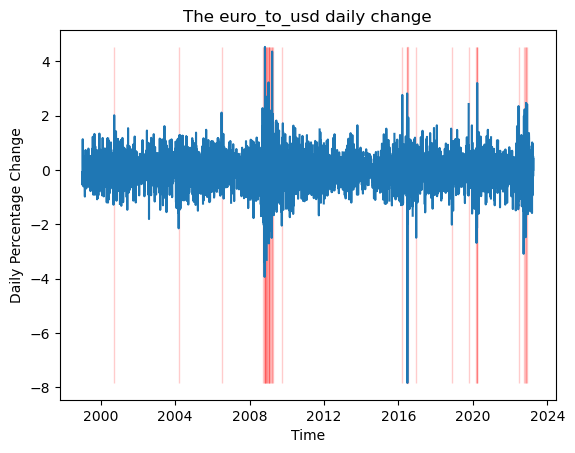

In [35]:

df["boolean"] = (df["growth_euro"] > 2) | (df["growth_euro"] < -2)
plt.plot("date", "growth_euro", data = df)
plt.xlabel("Time")
plt.ylabel("Daily Percentage Change")
plt.title("The euro_to_usd daily change")
plt.fill_between(x= df["date"],
                 y1 = df['growth_euro'].min(),
                 y2 = df['growth_euro'].max(),
                 where = df["boolean"],
                 alpha = 0.2,color = "red")

<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 20 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [37]:
# Write your own code
month_config = pd.Grouper(key = 'date', freq = 'm')
monthlydata = df.groupby(month_config).agg(euro_to_usd_std = ("eur_to_usd","std")).reset_index()
display(monthlydata)

,date,euro_to_usd_std
0,1999-01-31,0.007345
1,1999-02-28,0.013345
2,1999-03-31,0.010475
3,1999-04-30,0.006172
4,1999-05-31,0.013046
...,...,...
286,2022-11-30,0.027308
287,2022-12-31,0.011389
288,2023-01-31,0.015046
289,2023-02-28,0.008972


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the df dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 21 for details on ```pd.melt()```

In [23]:
# Write your own code
df['date'] = pd.to_datetime(df['date_string'], errors='coerce')

df.drop('date_string', axis=1, inplace=True)

df_long = pd.melt(df, id_vars=['date'], value_vars=['eur_to_usd', 'gbp_to_usd'], 
                  var_name='type', value_name='exchange_rate')

print(df_long.head())

        date        type  exchange_rate
0 1999-01-04  eur_to_usd         1.6581
1 1999-01-05  eur_to_usd         1.6566
2 1999-01-06  eur_to_usd         1.6547
3 1999-01-07  eur_to_usd         1.6495
4 1999-01-08  eur_to_usd         1.6405
